In [1]:
import numpy as np
from sympy import *
from datetime import datetime
from matplotlib import pyplot as plt
from urllib import request
import pandas as pd

# 1.1. 대소문자 바꾸기

In [2]:
a = "Python"
aa = ""
for spell in a:
    if spell.isupper():
        aa += spell.lower()
    elif spell.islower():
        aa += spell.upper()
    else:
        print("문자열이 아닙니다")
aa

'pYTHON'

# 1.2. 나누기의 몫과 나머지 출력

In [3]:
b = int(input("나눠질 큰 수를 입력하세요: "))
bb = int(input("나눌 작은 수를 입력하세요: "))
print(f'몫:{b//bb}, 나머지:{b%bb}')

나눠질 큰 수를 입력하세요: 1023
나눌 작은 수를 입력하세요: 78
몫:13, 나머지:9


# 1.3. 자릿수 출력

In [4]:
c = int(input("십진수 정수를 입력하세요: "))
len_c = len(str(c))
cc = ""
while int(c) > 1:
    cc += str(c%2)
    c //= 2
cc += str(1)

print(f'10진수 자릿수: {len_c}, 2진수 자릿수: {len(cc)}')

십진수 정수를 입력하세요: 1234567
10진수 자릿수: 7, 2진수 자릿수: 21


# 1.4. 방정식의 근 구하기

In [5]:
def function_solve(a,b,c):
    x = symbols('x')
    equation = a*x**2 + b*x + c
    print("x의 근: ",solve(equation))
    
function_solve(1,1,-1)
function_solve(1,2,1)
function_solve(0,1,2)
function_solve(1,1,2)

x의 근:  [-1/2 + sqrt(5)/2, -sqrt(5)/2 - 1/2]
x의 근:  [-1]
x의 근:  [-2]
x의 근:  [-1/2 - sqrt(7)*I/2, -1/2 + sqrt(7)*I/2]


# 1.5. 소수를 판별하는 함수

In [6]:
def prime_number(num,list_prime):
    tf = True
    if num == 0:
        tf = False
    elif num == 1:
        tf = False
    else:
        for i in range(2,int(np.sqrt(num)) +1):
            if num % i == 0:
                tf = False
                break
    if tf:
        list_prime.append(num)

## (1)소수의 개수 계산

In [7]:
def nmax_prime(nmax, nmin=1):
    primes = []
    for i in range(nmin, nmax +1):
        prime_number(i,primes)
    print(f'{nmin}부터 {nmax}까지 소수는 {len(primes)}개')
    
    return len(primes)

for n in [10**2,10**3,10**4,10**5]:
    nmax_prime(n)

1부터 100까지 소수는 25개
1부터 1000까지 소수는 168개
1부터 10000까지 소수는 1229개
1부터 100000까지 소수는 9592개


## (2)구간 안의 소수의 개수

In [8]:
hist_list = {}
for k in range(6):
    count = nmax_prime(10**(k+1),nmin=10**k+1)
    hist_list[k] = count

2부터 10까지 소수는 4개
11부터 100까지 소수는 21개
101부터 1000까지 소수는 143개
1001부터 10000까지 소수는 1061개
10001부터 100000까지 소수는 8363개
100001부터 1000000까지 소수는 68906개


Text(0.5, 1.0, '$10^k+1$ to $10^{k+1}$')

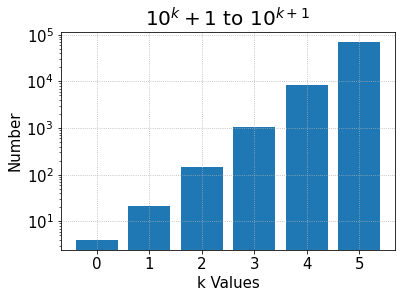

In [9]:
plt.bar(hist_list.keys(),hist_list.values())
plt.xlabel('k Values',fontsize=15);plt.xticks(fontsize=15)
plt.yscale('log');plt.ylabel('Number',fontsize=15);plt.yticks(fontsize=15)
plt.grid(axis='both',linestyle=':')
plt.title(r'$10^k+1$ to $10^{k+1}$',fontsize=20)

# 1.6. 피보나치 수 구하기

In [10]:
def fibo(nmax, nmin=0):
  fibo_list = np.array([0,1],dtype=np.float64)
  while True:
    last_num = fibo_list[-1] + fibo_list[-2]
    if nmax > last_num:
      fibo_list = np.append(fibo_list,last_num)
    else:
      break
  return fibo_list[fibo_list >= nmin]

## (1)구간 안의 피보나치 수의 개수

In [11]:
for kk in range(6):
  fibo_num = len(fibo(10**(kk+1),nmin=10**kk))
  print(f'k={kk}일 때 수열의 개수는 {fibo_num}')

k=0일 때 수열의 개수는 6
k=1일 때 수열의 개수는 5
k=2일 때 수열의 개수는 5
k=3일 때 수열의 개수는 4
k=4일 때 수열의 개수는 5
k=5일 때 수열의 개수는 5


## (2)인접한 두 피보나치 수의 비, 수렴값 구하기

In [12]:
i = 0
fibo_ratio = np.array([],dtype=np.float64)
while True:
  fibo_ratio_list = fibo(i,nmin=1)
  i += fibo_ratio_list[-1]

  if len(fibo_ratio_list) == 101:
    fibo_ratio = np.append(fibo_ratio, fibo_ratio_list[-1]/fibo_ratio_list[-2])
    break
  
  elif len(fibo_ratio_list) > 1:
    fibo_ratio = np.append(fibo_ratio, fibo_ratio_list[-1]/fibo_ratio_list[-2])

Text(0.5, 1.0, 'Fibonacci number ratio')

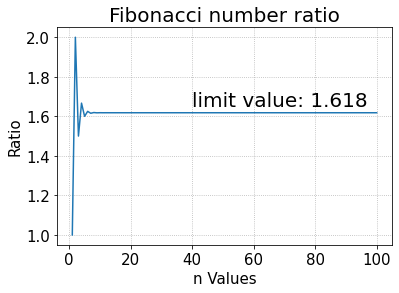

In [13]:
plt.plot(range(1,101),fibo_ratio)
plt.xlabel('n Values',fontsize=15);plt.xticks(fontsize=15)
plt.ylabel('Ratio',fontsize=15);plt.yticks(fontsize=15)
plt.grid(axis='both',linestyle=':')
plt.text(40,1.65,f"limit value: {round(fibo_ratio[-1],4)}",fontsize=20)
plt.title("Fibonacci number ratio",fontsize=20)

# 1.7. 완전수 구하기

In [14]:
def perfect_number(num):
  if num != 1:
    div = [1]
    for i in range(2,int(np.sqrt(num)) +1):
      if num%i == 0:
        div.extend([i,num//i])
    div.append(num)
    if sum(set(div)) == 2*num:
      return True, div
    else:
      return False, div

## (1)약수를 계산하는 함수를 작성

In [15]:
numb = int(input("약수를 구하고 싶은 숫자: "))
tf, div_list = perfect_number(numb)
print(div_list)

약수를 구하고 싶은 숫자: 27
[1, 3, 9, 27]


## (2)100,000이하의 모든 완전수 출력

In [16]:
perfect_list = []
for i in range(2,10**5 +1):
  val, list_div = perfect_number(i)
  if val:
    perfect_list.append(i)
print(perfect_list)

[6, 28, 496, 8128]


# 1.8. datetime 모듈 사용하기

In [17]:
now = datetime.now()
print("Today is "+now.strftime('%B %d, %Y'))
print("Current time is "+now.strftime('%H:%M:%S'))

Today is March 15, 2022
Current time is 18:46:44


# 1.9. 알파벳 H 출력하기

In [18]:
def print_h(n):
  print('*'*n+' '*n+'*'*n)

def whi(n):
  i = 0
  while i != n:
    print_h(n)
    i += 1

def star(n):
  i = 0
  while i != n:
    print('*'*3*n)
    i += 1

n = int(input("숫자를 입력하세요: "))
whi(n);star(n);whi(n)

숫자를 입력하세요: 3
***   ***
***   ***
***   ***
*********
*********
*********
***   ***
***   ***
***   ***


# 1.10. 자료 읽고 데이터 다루기

In [19]:
url = 'http://astro.snu.ac.kr/~wkim/PyData/test1.dat'
data_list = request.urlopen(url).read().decode('utf-8')
data_list = data_list.replace('\n','\t').split('\t')[:-1]

## (1)파일 저장

In [20]:
data = np.array(data_list).reshape(-1,3)
data = pd.DataFrame(data,columns=['x','a','b']) ; data.index += 1
data = data.apply(pd.to_numeric)
data.to_csv("test1_dat.csv",encoding='CP949')

## (2)10의 배수인 자료 저장

In [21]:
output = data[(data.index%10 == 0)].reset_index(drop=True); output.index += 1
output.to_csv("output_dat.csv",encoding='CP949')

## (3)그래프 그리기

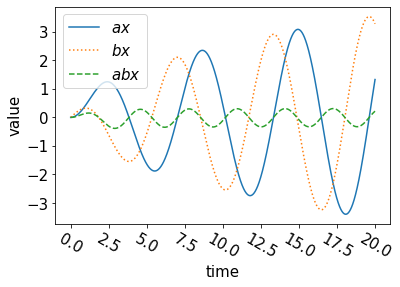

In [22]:
plt.plot(data['x'],data['a']*data['x'],'-',label=r'$ax$')
plt.plot(data['x'],data['b']*data['x'],':',label=r'$bx$')
plt.plot(data['x'],data['a']*data['b']*data['x'],'--',label=r'$abx$')

plt.xlabel("time",fontsize=15);plt.ylabel("value",fontsize=15)
plt.xticks(rotation=-30,fontsize=15);plt.yticks(fontsize=15)
plt.legend(fontsize=15)

# 1.11. 로지스틱 사상(초기값은 $x_0=0.1$)

In [23]:
def logistic(xn=0.1,r=1):
  x_nplus = r*xn*(1-xn)
  return x_nplus

## (1)r=2.5이고 n=[0,1000]일 때를 함수로 그리고 $x_{1000}$값 출력

In [24]:
logi_list = [0.1] ; x = 0.1 ; i = 0
while i < 1000:
  x = logistic(xn=x,r=2.5)
  logi_list.append(x)
  i += 1

(array([0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

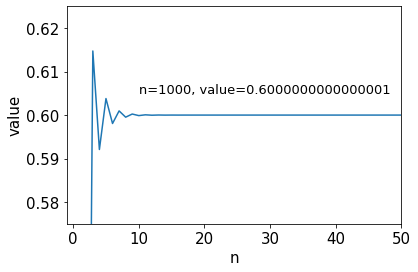

In [25]:
plt.plot(range(1001),logi_list)
plt.text(10,0.605,f"n=1000, value={logi_list[1000]}",fontsize=13)
plt.xlim(-1,50);plt.ylim(0.575,0.625)
plt.xlabel("n",fontsize=15);plt.ylabel("value",fontsize=15)
plt.xticks(fontsize=15);plt.yticks(fontsize=15)

## (2)r=3.25이고 n=[0,1000]일 때를 함수로 그리고 반복값 출력

In [26]:
logi_list = [0.1] ; x = 0.1 ; i = 0
while i < 1000:
  x = logistic(xn=x,r=3.25)
  logi_list.append(x)
  i += 1

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

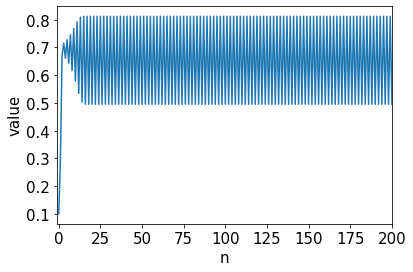

In [27]:
plt.plot(range(1001),logi_list)
plt.xlim(-1,200)
plt.xlabel("n",fontsize=15);plt.ylabel("value",fontsize=15)
plt.xticks(fontsize=15);plt.yticks(fontsize=15)

## n=100 이후 값이 반복하는 것으로 생각 됨

In [28]:
print("반복되는 값: ",set(logi_list[100:]))

반복되는 값:  {0.4952651682454746, 0.8124271394468331}


## (3)r=3.5이고 n=[0,1000]일 때를 함수로 그리고 반복값 출력

In [29]:
logi_list = [0.1] ; x = 0.1 ; i = 0
while i < 1000:
  x = logistic(xn=x,r=3.5)
  logi_list.append(x)
  i += 1

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

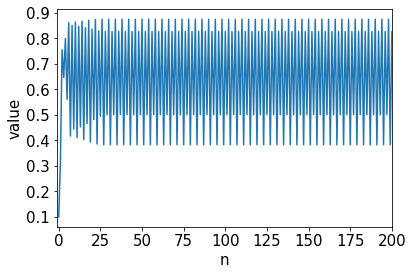

In [30]:
plt.plot(range(1001),logi_list)
plt.xlim(-1,200)
plt.xlabel("n",fontsize=15);plt.ylabel("value",fontsize=15)
plt.xticks(fontsize=15);plt.yticks(fontsize=15)

## n=100 이후 값이 반복하는 것으로 생각 됨

In [31]:
print("반복되는 값: ",set(logi_list[100:]))

반복되는 값:  {0.8269407065914387, 0.5008842103072179, 0.38281968301732416, 0.8749972636024641}


## (3)r=[2,4]구간에서 r이 $10^{-4}$씩 변화하며 n=[1000,1100]일 때를 함수로 그리기

In [32]:
r_list = np.arange(2,4.00001,10**(-4))
logi_dic = {}
for rr in r_list:
  logi_list = [] ; x = 0.1 ; i = 0
  while i < 1100:
    x = logistic(xn=x,r=rr)
    if i >= 999:
      logi_list.append(x)
    i += 1
  logi_dic[rr] = np.array(logi_list)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

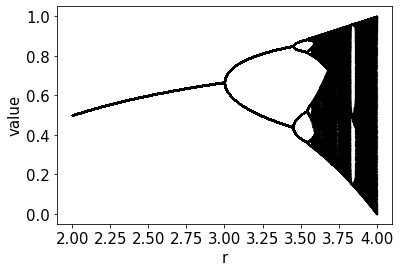

In [33]:
x_axis = np.ones(101)
for keys in logi_dic.keys():
  plt.plot(x_axis*keys,logi_dic[keys],linestyle='none',marker='o',color='black',markersize=0.1)

plt.xlim(1.9,4.1)
plt.xlabel("r",fontsize=15);plt.ylabel("value",fontsize=15)
plt.xticks(fontsize=15);plt.yticks(fontsize=15)